<a href="https://colab.research.google.com/github/Siddhant254/Deep-Learning-Concepts/blob/master/Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [4]:
X,y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

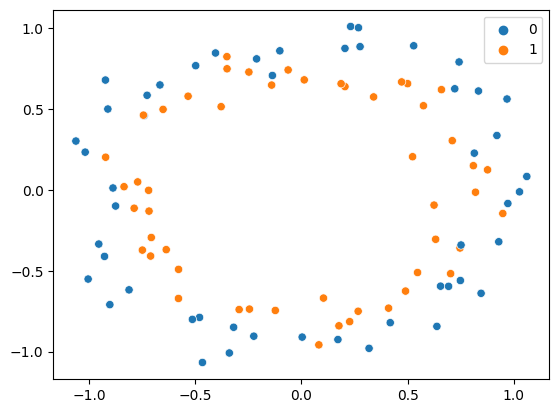

In [5]:
sns.scatterplot(x = X[:,0], y = X[:,1],hue=y)


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,verbose=0)

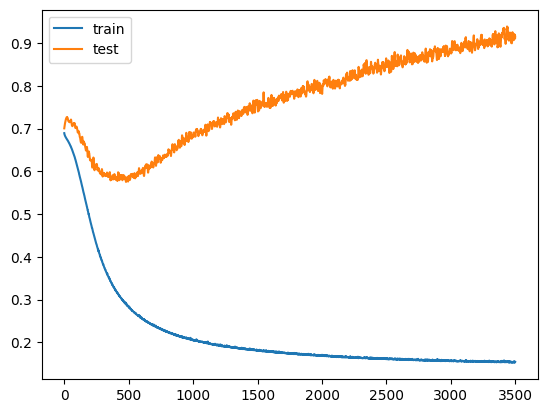

In [10]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()


9600/9600 [==============================] - 12s 1ms/step


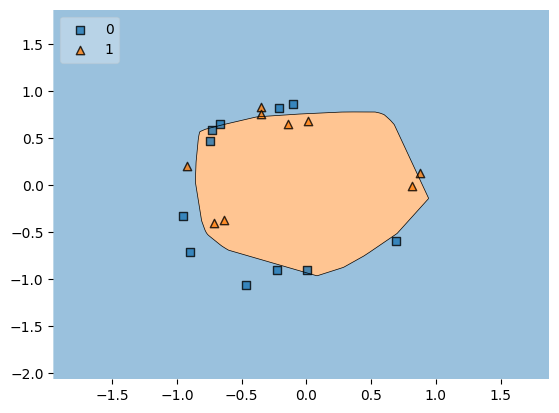

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

# EARLY STOPPING



In [37]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [40]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,callbacks = callback)

Epoch 1/3500
3/3 [==============================] - 1s 87ms/step - loss: 0.6928 - accuracy: 0.4875 - val_loss: 0.6896 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6904 - accuracy: 0.4875 - val_loss: 0.6919 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6892 - accuracy: 0.4875 - val_loss: 0.6928 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6882 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5500
Epoch 5/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6876 - accuracy: 0.5500 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 6/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.6866 - accuracy: 0.5750 - val_loss: 0.6965 - val_accuracy: 0.5500
Epoch 7/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6859 - accuracy: 0.5500 - val_loss: 0.6986 - val_accuracy: 0.4000
Epoch 8/3500


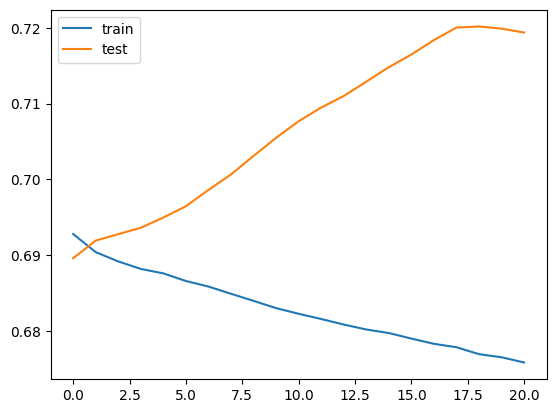

In [41]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()


9600/9600 [==============================] - 13s 1ms/step


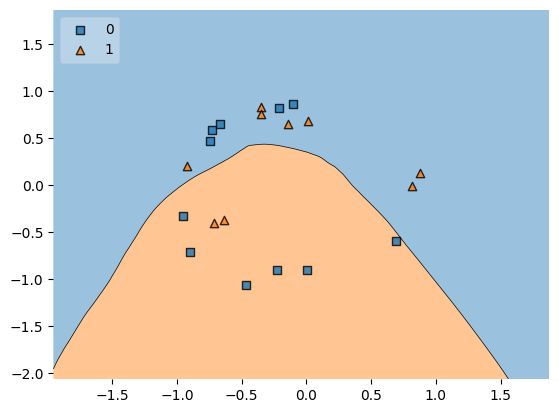

In [42]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.0 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
